# Artificial Intelligence N1 (5:00 PM) - Artificial Neural Network
♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢♢

## Assignment 5 Artificial Neural Network: feedforward.

By:

**Fernando Patricio Gutiérrez González 2010356**

**Axel Muñoz Baca 2132103**

**Ulises Castillo Díaz 2050354**

**Pablo Daniel Contreras Obregón 2055281**



In [47]:
# TensorFlow y tf.keras
import tensorflow as tf

# Otras librerías por usar
import numpy as np
import matplotlib.pyplot as plt

## NO se usó scikit-learn.fit para este trabajo, se usó unicamente la librería de Tensorflow y Keras

In [48]:
number_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [49]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

"""
Como comentario: No se usó el nombre de variable que venía en el dataset de Fashion visto en clase,
se usó lo siguiente:
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test
"""

'\nComo comentario: No se usó el nombre de variable que venía en el dataset de Fashion visto en clase,\nse usó lo siguiente:\ntrain_images = x_train\ntrain_labels = y_train\ntest_images = x_test\ntest_labels = y_test\n'

In [50]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
len(y_train)

60000

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
len(y_test)

10000

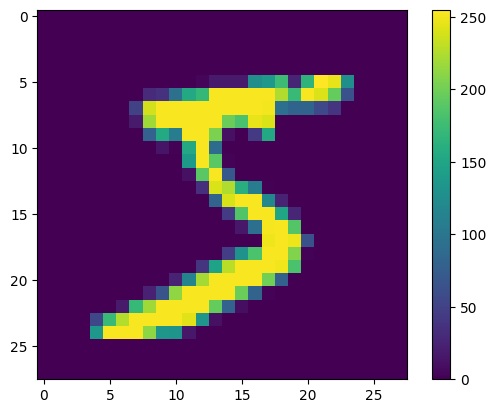

In [56]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [57]:
x_train = x_train / 255.0

x_test = x_test / 255.0

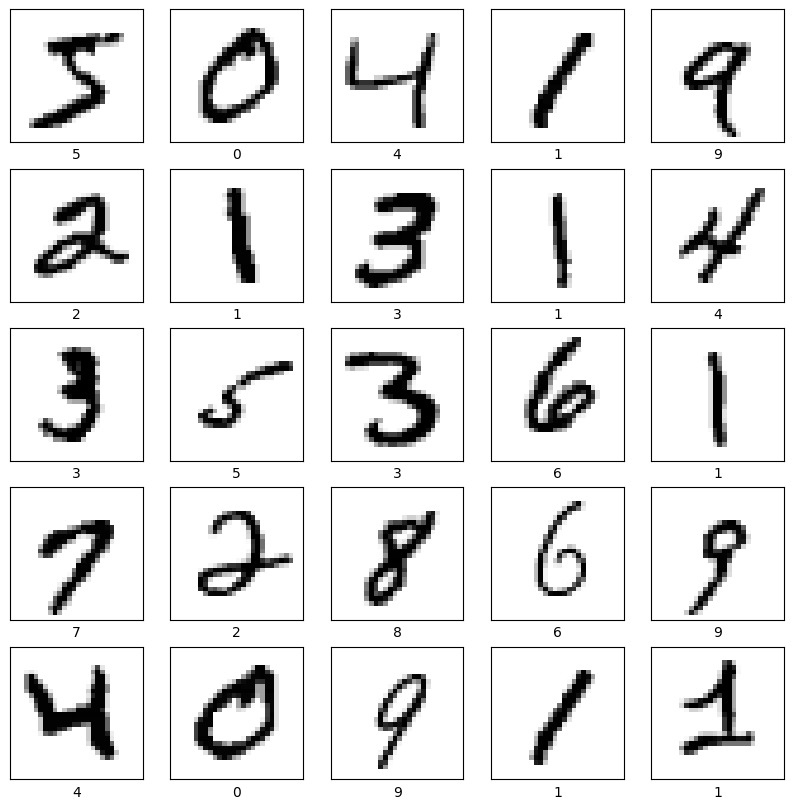

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8808 - loss: 0.4249
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9649 - loss: 0.1216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9770 - loss: 0.0772
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0555
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0456
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0217
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9954 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9960 - loss: 0.0135


In [62]:
print("Model's evaluation")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'\nAccuracy of testing dataset: {test_acc}')

Model's evaluation
313/313 - 1s - 2ms/step - accuracy: 0.9768 - loss: 0.0919

Accuracy of testing dataset: 0.9768000245094299


In [63]:
predictions = model.predict(x_test)
print("\n--- Five model predictions ---")
for i in range(5):
    predicted_digit = np.argmax(predictions[i])
    actual_digit = y_test[i]
    print(f"Prediction No.- {i+1}: The model stated {predicted_digit}, while the real value is {actual_digit}")
# Here's an extra Prof
print("\n Extra prediction: ")
predicted_digit = np.argmax(predictions[10])
actual_digit = y_test[10]
print(f"Prediction No.- {10}: The model stated {predicted_digit}, while the real value is {actual_digit}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Five model predictions ---
Prediction No.- 1: The model stated 7, while the real value is 7
Prediction No.- 2: The model stated 2, while the real value is 2
Prediction No.- 3: The model stated 1, while the real value is 1
Prediction No.- 4: The model stated 0, while the real value is 0
Prediction No.- 5: The model stated 4, while the real value is 4

 Extra prediction: 
Prediction No.- 10: The model stated 0, while the real value is 0


In [64]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {class_names[predicted_label]} ({100*np.max(predictions_array):2.0f}%) (Real: {class_names[true_label]})",
                 color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

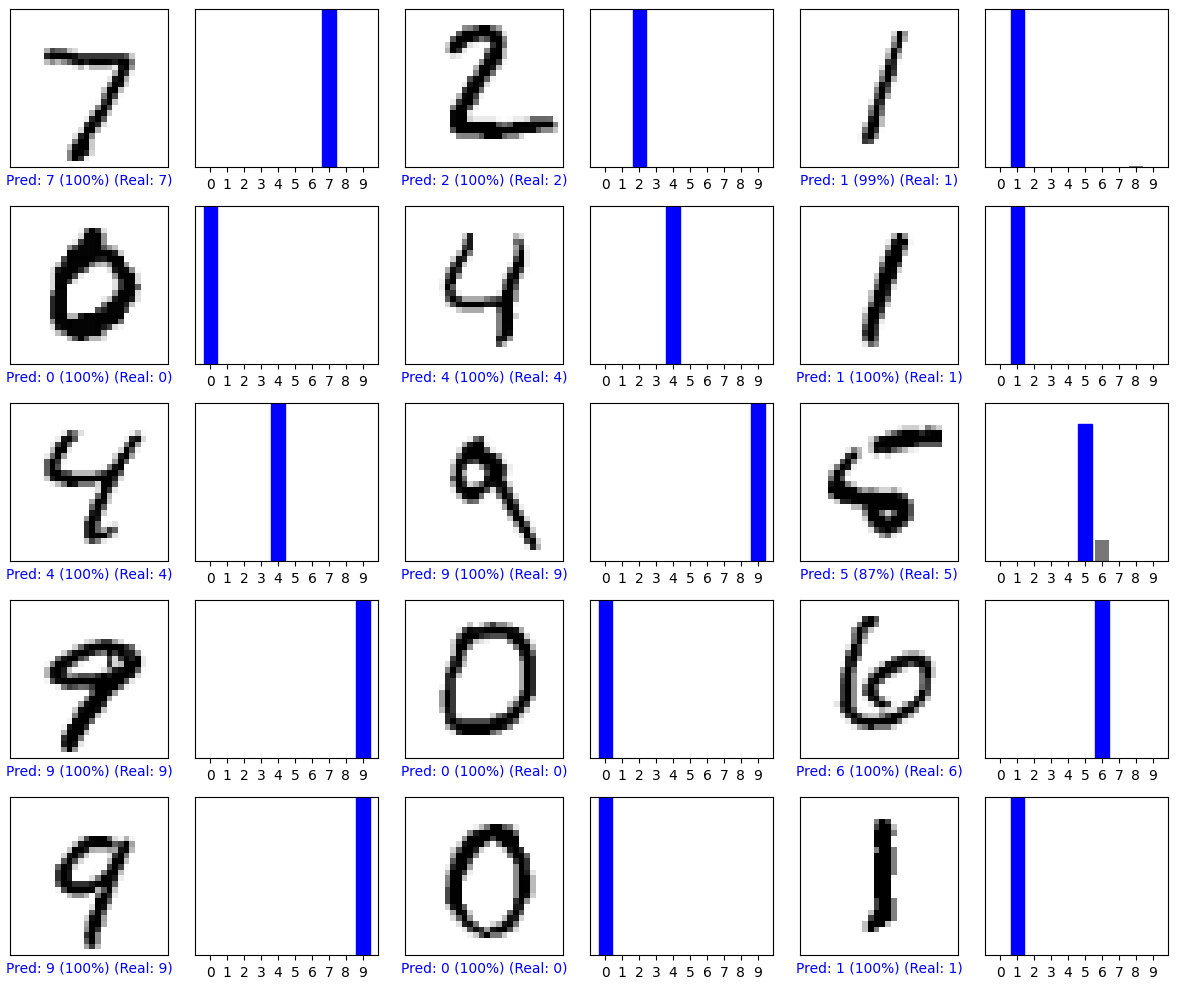

In [65]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)

plt.tight_layout()
plt.show()

In [66]:
img = x_test[1]

print(f"Original shape: {img.shape}")
img_batch = (np.expand_dims(img, 0))

print(f"Original model shape: {img_batch.shape}")

Original shape: (28, 28)
Original model shape: (1, 28, 28)


In [67]:
predictions_single = model.predict(img_batch)

print(f"Prediction (prob): {predictions_single}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction (prob): [[9.6231042e-13 2.2621460e-09 1.0000000e+00 5.2428678e-10 4.4830584e-22
  2.8067692e-11 1.4274538e-11 1.3245079e-21 1.0141426e-08 5.1627248e-22]]


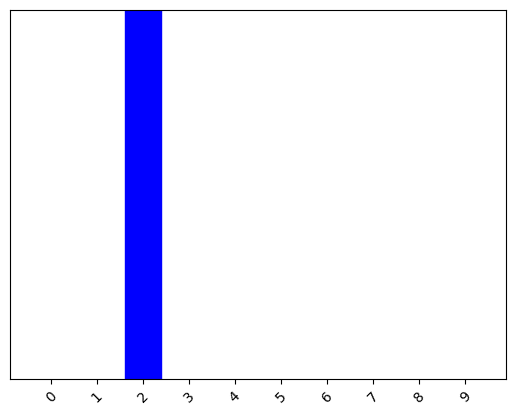

In [68]:
plot_value_array(0, predictions_single, [y_test[1]])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [69]:
predicted_digit = np.argmax(predictions_single[0])

print(f"The predicted number is: {class_names[predicted_digit]}")
print(f"The real number is: {class_names[y_test[1]]}")

The predicted number is: 2
The real number is: 2
